In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importa dati dell'Istituto Superiore di Sanità
Questi dati sono ricavati dai bollettini settimanali dell'ISS. Vedi ad esempio https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_1-settembre-2021.pdf

In [2]:
df_assoluti = pd.read_csv('dati/dati_ISS_complessivi.csv', sep=';')

df_assoluti

,data,non vaccinati,vaccinati completo,casi non vaccinati,casi vaccinati,ospedalizzati non vaccinati,ospedalizzati vaccinati,terapia intensiva non vaccinati,terapia intensiva vaccinati,decessi non vaccinati,decessi vaccinati
0,08/09/2021,14507530,34292078,104890,43775,6579,2118,712,157,571,280
1,01/09/2021,15656647,32287644,107937,40380,5988,1788,641,127,383,187
2,25/8/2021,16708830,29628678,104405,33894,5162,1349,500,95,246,92
3,18/8/2021,17568325,26501452,95261,24978,4052,859,334,61,177,48
4,11/8/2021,20322716,22345659,80585,18887,3067,627,247,34,143,34
5,4/8/2021,21289761,19570464,60267,12333,2234,404,169,23,128,34
6,28/07/2021,22879167,17389604,40729,7277,1619,280,123,16,169,38
7,21/07/2021,24745853,15384196,26284,3805,1483,224,117,8,250,46
8,14/07/2021,27065063,13929401,21089,2310,1880,240,147,7,357,68


### Elaborazione dati
Calcola tassi di infezione, ospedalizzazione e decessi per vaccinati e non vaccinati

In [3]:
# ricava i tassi, divivendo per la popolazione vaccinati e non vaccinata
tassi = 10**6*np.transpose([df_assoluti['casi non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['casi vaccinati']/df_assoluti['vaccinati completo'],                  
         df_assoluti['ospedalizzati non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['ospedalizzati vaccinati']/df_assoluti['vaccinati completo'],
         df_assoluti['terapia intensiva non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['terapia intensiva vaccinati']/df_assoluti['vaccinati completo'],
         df_assoluti['decessi non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['decessi vaccinati']/df_assoluti['vaccinati completo']])

df_tassi = pd.DataFrame(tassi)
df_tassi.columns = ['Casi, non vaccinati',
                    'Casi, vaccinati',
                    'Ospedalizzati, non vaccinati', 
                    'Ospedalizzati, vaccinati',
                    'In terapia intensiva, non vaccinati',
                    'In terapia intensiva, vaccinati',
                    'Deceduti, non vaccinati',
                    'Deceduti, vaccinati']

df_tassi.index = pd.to_datetime(df_assoluti['data'], format='%d/%m/%Y')

df_tassi

,"Casi, non vaccinati","Casi, vaccinati","Ospedalizzati, non vaccinati","Ospedalizzati, vaccinati","In terapia intensiva, non vaccinati","In terapia intensiva, vaccinati","Deceduti, non vaccinati","Deceduti, vaccinati"
data,,,,,,,,
2021-09-08,7230.038470,1276.533898,453.488637,61.763536,49.077962,4.578317,39.358871,8.165151
2021-09-01,6894.004827,1250.633214,382.457368,55.377221,40.941078,3.933393,24.462454,5.791689
2021-08-25,6248.492564,1143.959241,308.938448,45.530212,29.924298,3.206353,14.722754,3.105100
2021-08-18,5422.315446,942.514395,230.642363,32.413318,19.011488,2.301761,10.074950,1.811222
2021-08-11,3965.267241,845.220094,150.914868,28.059141,12.153887,1.521548,7.036461,1.521548
2021-08-04,2830.797396,630.184343,104.933071,20.643353,7.938088,1.175240,6.012280,1.737312
2021-07-28,1780.178448,418.468414,70.763066,16.101574,5.376070,0.920090,7.386633,2.185214
2021-07-21,1062.157768,247.331742,59.929233,14.560397,4.728065,0.520014,10.102703,2.990082
2021-07-14,779.196413,165.836277,69.462244,17.229743,5.431356,0.502534,13.190437,4.881761


### Rappresentazione grafica dei risultati

In [4]:
def which_axe(x):
    axes[x].set_ylabel('Numeri per milione di abitanti')
    axes[x].set_xlabel('')
    axes[x].set_xticks(x_date)
    axes[x].set_xticklabels(x_label)
    axes[x].legend(['Non vaccinati', 'Vaccinati'])
    axes[x].grid()

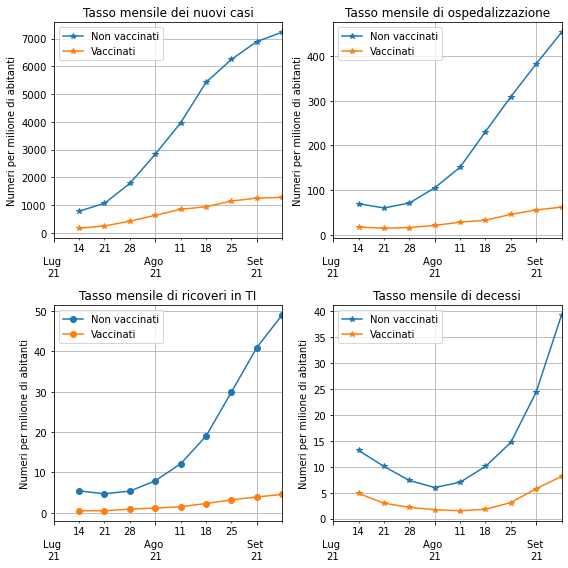

In [5]:
fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
x_date = ['2021-07-01', '2021-08-01', '2021-09-01']
x_label = ['\nLug \n21', '\nAgo \n21', '\nSet \n21']

# unpack all the axes subplots
axes = axes2.ravel()

df_tassi.iloc[:, [0, 1]].plot(ax=axes[0], marker='*')
axes[0].set_title('Tasso mensile dei nuovi casi')
which_axe(0)

df_tassi.iloc[:, [2, 3]].plot(ax=axes[1], marker='*')
axes[1].set_title('Tasso mensile di ospedalizzazione')
which_axe(1)

df_tassi.iloc[:, [4, 5]].plot(ax=axes[2], marker='o')
axes[2].set_title('Tasso mensile di ricoveri in TI')
which_axe(2)

df_tassi.iloc[:, [6, 7]].plot(ax=axes[3], marker='*')
axes[3].set_title('Tasso mensile di decessi')
which_axe(3)

plt.tight_layout()
plt.savefig('risultati/andamento_epidemia.png', dpi=300)
plt.show()

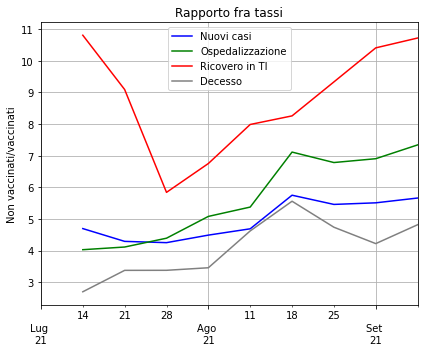

In [6]:
plt.figure(figsize=(6, 5))
(df_tassi.iloc[:, 0]/df_tassi.iloc[:, 1]).plot(label='Nuovi casi', color='blue')
(df_tassi.iloc[:, 2]/df_tassi.iloc[:, 3]).plot(label='Ospedalizzazione', color='green')
(df_tassi.iloc[:, 4]/df_tassi.iloc[:, 5]).plot(label='Ricovero in TI', color='red')
(df_tassi.iloc[:, 6]/df_tassi.iloc[:, 7]).plot(label='Decesso', color='gray')
plt.title('Rapporto fra tassi')
plt.legend()
plt.xticks(x_date, x_label)
plt.xlabel('')
plt.ylabel('Non vaccinati/vaccinati')
plt.grid()
plt.tight_layout()
plt.savefig('risultati/rapporto_tra_tassi.png', dpi=300)
plt.show()